# EKG Filtering

EKG signals are measurements of the electrical activity of the heart as it beats. As with most real world systems, they are susceptible to noise. As the following plot shows, the raw signal has a number of different types of noise.

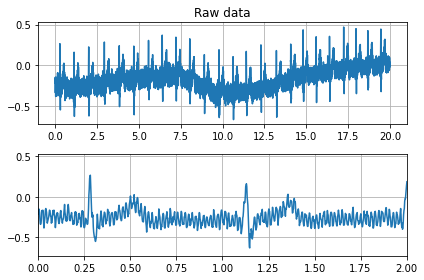

1. There is a low frequency noise that causes the overall signal to drift from the actual baseline
2. There is a high frequency noise that adds error locally at each time instance

The EKG signal is made up of a number of characteristic peaks and troughs that need to be observed in order to determine whether a person has a healthy heart rate. You can see the different signals observed for different people in this dataset, from all ages, genders and levels of fitness.

Modify the following line to see different signals for different people in the dataset:


<code>sig, fields = wfdb.rdsamp("./data/ecg-id-database-1.0.0/Person_02/rec_1")</code>

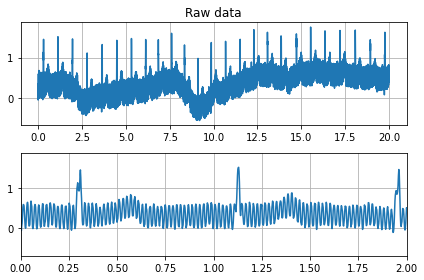

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb

sig, fields = wfdb.rdsamp("./data/ecg-id-database-1.0.0/Person_03/rec_1")
df = pd.DataFrame(sig, columns=fields['sig_name'])

f = 500
time = np.arange(0, 20, 1/500)

fig, ax = plt.subplots(2,1)
ax[0].plot(time, df['ECG I'])
ax[1].plot(time, df['ECG I'])

ax[0].grid()
ax[1].grid()

ax[0].set_title("Raw data")

#ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)

plt.tight_layout()
plt.show()

# Exponential Moving Average filter to reduce high frequency noise

In order to reduce the high frequency noise in the signal, an exponential moving average filter is used _(Can you figure out why this particular filter was chosen? Try implementing other filters to see the result)_

Try playing around with different values of alpha to see how it affects the smoothing. 

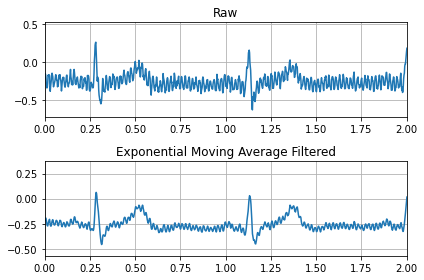

In [3]:
alpha = 0.2

exp_filtered = df['ECG I'].copy()
for i in range(1, len(df['ECG I'])):
  exp_filtered[i] = alpha * df['ECG I'][i] + (1-alpha) * exp_filtered[i-1]

fig, ax = plt.subplots(2,1)
ax[0].plot(time, df['ECG I'])
ax[1].plot(time, exp_filtered)

ax[0].grid()
ax[1].grid()

ax[0].set_title("Raw")
ax[1].set_title("Exponential Moving Average Filtered")

ax[0].set_xlim(0,2)
ax[1].set_xlim(0,2)

plt.tight_layout()
plt.show()

# Fourier transform

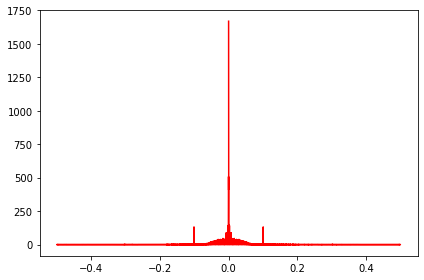

In [4]:
yf = np.fft.fft(exp_filtered)
xf = np.fft.fftfreq(len(exp_filtered))

fig, ax = plt.subplots(1,1)
ax.plot(xf, np.abs(yf), 'r')

# ax.set_xlim(-0.15, 0.15)
plt.tight_layout()
plt.show()

# Removing low frequency drift

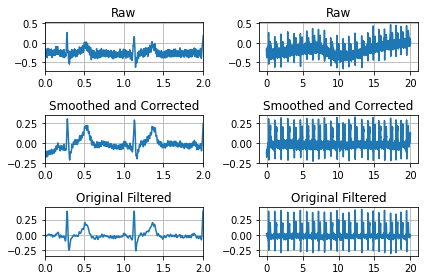

In [5]:
yf[abs(xf) < 0.002] = 0

y = np.fft.ifft(yf)

fig, ax = plt.subplots(3,2)
[ax[0][i].plot(time, df['ECG I']) for i in range(2)]
[ax[1][i].plot(time, np.real(y)) for i in range(2)]
[ax[2][i].plot(time, df['ECG I filtered']) for i in range(2)]

[[ax[i][j].grid() for j in range(2)] for i in range(3)]

[ax[0][i].set_title("Raw") for i in range(2)]
[ax[1][i].set_title("Smoothed and Corrected") for i in range(2)]
[ax[2][i].set_title("Original Filtered") for i in range(2)]

ax[0][0].set_xlim(0,2)
ax[1][0].set_xlim(0,2)
ax[2][0].set_xlim(0,2)

plt.tight_layout()
plt.show()